In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
dataFrame = pd.read_csv("titanic.csv")

In [3]:
dataFrame.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
dataFrame.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [5]:
from sklearn import preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
cinsiyet = dataFrame.iloc[:,3:4].values

In [8]:
cinsiyet = le.fit_transform(cinsiyet)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
cinsiyet #1=male 0=female

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [10]:
dataFrame["Sex"]=cinsiyet  ##kategorik olan verileri label encoding ile numeric veriye çevirdim.

In [11]:
dataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [12]:
dataFrame = dataFrame.drop("Name",axis = 1) ##hayatta kalmaya etkisinin olmadığını düşündüğüm name sütununu kaldırdım.

<Axes: xlabel='Age'>

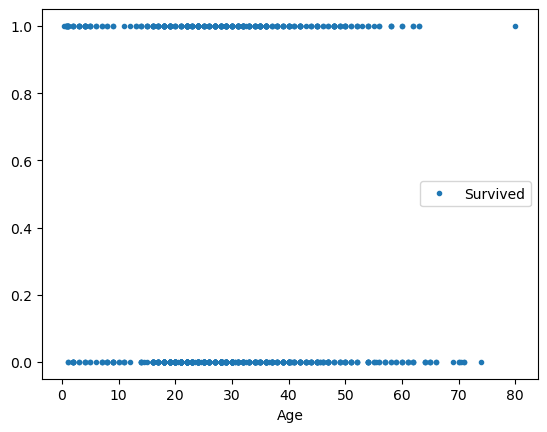

In [13]:
dataFrame.plot(x='Age', y='Survived', style=".")

In [14]:
dataFrame

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc =preprocessing.StandardScaler()

In [17]:
x = dataFrame.iloc[:,1:7].values

In [18]:
y= dataFrame["Survived"]

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state= 100)

In [21]:
x_train=sc.fit_transform(x_train)

In [22]:
x_test=sc.transform(x_test)

## Random Forest ile %84 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
classifier = RandomForestClassifier(random_state=14,n_estimators =10, criterion = 'entropy' )

In [25]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=14)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.84


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)

In [31]:
cm

array([[165,  16],
       [ 32,  80]])

# # Decision Tree ile %78

In [32]:
from sklearn.tree import DecisionTreeClassifier 

In [33]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=55)

In [34]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=55)

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.78


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[147,  34],
       [ 31,  81]])

# # Logistic Regression ile %79

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression(random_state=0)

In [43]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.79


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[153,  28],
       [ 33,  79]])

# # SVM ile %79

In [50]:
from sklearn.svm import SVC

In [51]:
classifier = SVC(kernel='linear', random_state = 0)

In [52]:
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.79


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm = confusion_matrix(y_test, y_pred)

In [58]:
cm

array([[153,  28],
       [ 33,  79]])

# # KNN ile %82 

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

In [61]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.82


# # Polinimial reg. ile %82

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lin_reg_2 = LinearRegression()

In [75]:
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [76]:
poly_reg = PolynomialFeatures(degree = 7)

In [77]:
X_poly = poly_reg.fit_transform(x)

In [78]:
pol_reg = LinearRegression()

In [79]:
pol_reg.fit(X_poly, y)

LinearRegression()

In [81]:
polinom_linear_regresion=lin_reg_2.predict(X_poly)

In [83]:
accuracy = accuracy_score(y_test, y_pred)    
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.82
